# Lady Tasting Tea

In [49]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

## The Design of Experiments

> <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">
> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup. We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.<br><br>
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.<br><br>
> <i>The Design of Experiments By Ronald A. Fisher</i>

## Permutations and Combinations

### Permutations

A permutation is an ordering of its elements.

The set `{a, b, c}` has the permutations `abc`, `acb`, `bac`, `bca`, `cab`, and `cba`.


### Combinations

A combination is a selection of `k` elements from a set of size `n`.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set `{a, b, c}` are `{a, b}`, `{a, c}`, and `{b, c}`.

## Cups of Tea

In [50]:
# Number of cups of tea in total.
no_cups = 8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 4

## math.comb(n, k)

https://docs.python.org/3/library/math.html#math.comb

Calculate the number of ways to choose **k** elements from a set of **n** elements where the order of the chosen elements does not matter and no element is selected more than once.

 math.comb(n, k)

    Return the number of ways to choose k items from n items without repetition and without order.

    Evaluates to n! / (k! * (n - k)!) when k <= n and evaluates to zero when k > n.

In [51]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

# ans=70, so, selecting 1 of 70 possibilities

70

Label the eight cups of tea `1`, `2`, `3`, `4`, `5`, `6`, `7`, and `8`.

We select four cups to have milk in first.

For example, we might select `2`, `4`, `5`, and `8`.

Visualize having four placeholders where we place four of the cup labels.

How many ways are there to select four cups from eight?

Cups: `1 2 3 4 5 6 7 8`

Placeholders: `_ _ _ _`



In [52]:
# THIS IS ABOUT ORDER
# Total number of ways of selecting four cups from eight, keeping them in order.
# aka how many cups are we selecting from?

ways_ordered = 8 * 7 * 6 * 5         

# Show.
ways_ordered

1680

But do I think order is important?

Note we don't care about order: if cups `2`, `4`, `5`, and `8` are selected in order it is the same result as if `2`, `8`, `4`, and `5` were selected, or any other permutation.

`4 8 6 5`

`8 6 4 5`

SO how many different ways are there of reordering/shuffling/permuting four cups?

`_ _ _ _`

In [53]:
# THIS IS ABOUT SHUFFLING 4 CUPS
# No of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

In [54]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

70

## Formula

In mathematics, the `math.comb()` function is called the *choose* function.

WITHOUT REPETITION, WITHOUT ORDER

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.


In [55]:
# Number of cups of tea in total.
n = 8

In [56]:
# Number of cups of tea with milk in first.
k = 4

## math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

 math.factorial(n)

    Return n factorial as an integer. Raises ValueError if n is not integral or is negative.

Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `5! = 5 x 4 x 3 x 2 x 1 = 120`

In [57]:
# Eight factorial.
math.factorial(n)

40320

In [58]:
# Four factorial.
math.factorial(k)

24

In [59]:
# Four factorial.
math.factorial(n - k)

24

In [60]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

70

```
n! = 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1
k! = 4 x 3 x 2 x 1
(n - k)! = 4 x 3 x 2 x 1
n!/(n - k)! = (8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (4 x 3 x 2 x 1) = 8 x 7 x 6 x 5
```

#### Aside

In [61]:
# How many ways are there to shuffle a deck of 52 cards?
math.factorial(52)

80658175170943878571660636856403766975289505440883277824000000000000

## Ordering of Results

https://docs.python.org/3/library/itertools.html#itertools.combinations

 itertools.combinations(iterable, r)

    Return r length subsequences of elements from the input iterable.

In [62]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [63]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

In [64]:
# Number of combinations.
len(combs)

70

In [65]:
# Select four cups at random to put milk in first.

# https://docs.python.org/3/library/random.html#random.sample
#  random.sample(population, k, *, counts=None)
#  Return a k length list of unique elements chosen from the population sequence. Used for random sampling without replacement.

# NOT THE SAME AS RANDOM.CHOICES - WITH REPETITION/REPLACEMENT, EG: 6,3,3,4

labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[1, 2, 5, 6]

In [66]:
# Turn labels_milk into a set.

# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
# Sets
# Python also includes a data type for sets. 
# A set is an unordered collection with no duplicate elements. 
# Basic uses include membership testing and eliminating duplicate entries. 
# Set objects also support mathematical operations like union, intersection, difference, and symmetric difference.
# Curly braces or the set() function can be used to create sets. 
# Note: to create an empty set you have to use set(), not {}; 
# the latter creates an empty dictionary, a data structure that we discuss in the next section.

set(labels_milk)

{1, 2, 5, 6}

In [67]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = [] # have this as an empty list

for comb in combs:
  # Turn comb into a set (no order).
  s1 = set(comb)

  # Turn labels_milk into a set (no order).
  s2 = set(labels_milk)

  # Figure out where they overlap.
  overlap = s1.intersection(s2)

  # Show the combination and the overlap.
  # we can do this on set
  print(comb, overlap, len(overlap)) # len is length of a set

  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3) {1, 2} 2
(0, 1, 2, 4) {1, 2} 2
(0, 1, 2, 5) {1, 2, 5} 3
(0, 1, 2, 6) {1, 2, 6} 3
(0, 1, 2, 7) {1, 2} 2
(0, 1, 3, 4) {1} 1
(0, 1, 3, 5) {1, 5} 2
(0, 1, 3, 6) {1, 6} 2
(0, 1, 3, 7) {1} 1
(0, 1, 4, 5) {1, 5} 2
(0, 1, 4, 6) {1, 6} 2
(0, 1, 4, 7) {1} 1
(0, 1, 5, 6) {1, 5, 6} 3
(0, 1, 5, 7) {1, 5} 2
(0, 1, 6, 7) {1, 6} 2
(0, 2, 3, 4) {2} 1
(0, 2, 3, 5) {2, 5} 2
(0, 2, 3, 6) {2, 6} 2
(0, 2, 3, 7) {2} 1
(0, 2, 4, 5) {2, 5} 2
(0, 2, 4, 6) {2, 6} 2
(0, 2, 4, 7) {2} 1
(0, 2, 5, 6) {2, 5, 6} 3
(0, 2, 5, 7) {2, 5} 2
(0, 2, 6, 7) {2, 6} 2
(0, 3, 4, 5) {5} 1
(0, 3, 4, 6) {6} 1
(0, 3, 4, 7) set() 0
(0, 3, 5, 6) {5, 6} 2
(0, 3, 5, 7) {5} 1
(0, 3, 6, 7) {6} 1
(0, 4, 5, 6) {5, 6} 2
(0, 4, 5, 7) {5} 1
(0, 4, 6, 7) {6} 1
(0, 5, 6, 7) {5, 6} 2
(1, 2, 3, 4) {1, 2} 2
(1, 2, 3, 5) {1, 2, 5} 3
(1, 2, 3, 6) {1, 2, 6} 3
(1, 2, 3, 7) {1, 2} 2
(1, 2, 4, 5) {1, 2, 5} 3
(1, 2, 4, 6) {1, 2, 6} 3
(1, 2, 4, 7) {1, 2} 2
(1, 2, 5, 6) {1, 2, 5, 6} 4
(1, 2, 5, 7) {1, 2, 5} 3
(1, 2, 6, 7) {1, 2, 6} 3
(1, 3, 4, 5

In [68]:
# Show the overlaps.
print(no_overlaps)

[2, 2, 3, 3, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 3, 3, 2, 3, 3, 2, 4, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 2]


In [69]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

# if (array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1], dtype=int64)), means 
# 1 way of selecting no cups in the overlap/getting it all wrong
# 16 1/4 right
# 36 2/4 right
# 16 3/4 right
# 1 way to get it all right


(array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))

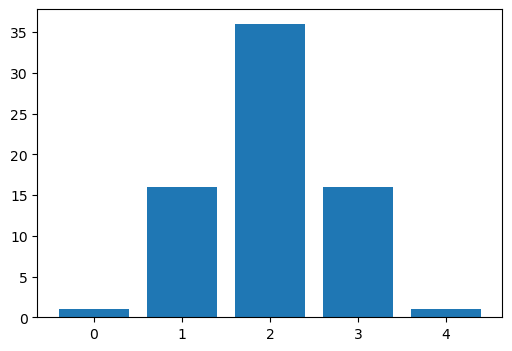

In [70]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

## The Null Hypothesis - NO EFFECT

- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first. (she doesnt know the difference)

- The lady is selecting the four cups from the eight cups at random.

BUT DONT SAY YOU ACCEPT NULL HYPOTHESIS, JUST SAY YOU DO NOT REJECT

## Alternative Hypothesis

- The lady can tell the difference. 



### Evidence

Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in seventy. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea. 

In [71]:
# The probability that she (randomly) selects the four correct cups.
1 / 70

0.014285714285714285

In [72]:
# The probability that she (randomly) selects at least three correct cups.
(16 + 1) / 70 # 16+1 is from plot above

0.24285714285714285

## Type I Errors, Type II Errors, and Power

 - Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types

 ![typeerror](typeerror.png)

 Type I error
 The first kind of error is the mistaken rejection of a null hypothesis as the result of a test procedure. This kind of error is called a type I error (false positive) and is sometimes called an error of the first kind. In terms of the courtroom example, a type I error corresponds to convicting an innocent defendant. 

 ype II error
 The second kind of error is the mistaken failure to reject the null hypothesis as the result of a test procedure. This sort of error is called a type II error (false negative) and is also referred to as an error of the second kind. In terms of the courtroom example, a type II error corresponds to acquitting a criminal

 - Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description
 If H 1 is True 	1-β (power)
 
 ![power](https://upload.wikimedia.org/wikipedia/commons/5/52/PowerOfTest.png)


##### Note
This notebook was created with the help of [GitHub Copilot](https://github.com/features/copilot).

## End